# Airbnb Bookings Analysis

# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     #for visualization
%matplotlib inline
import seaborn as sns               #for visualization
import warnings
warnings.filterwarnings('ignore')

# Load Airbnb Dataset

In [2]:
Airbnb_df = pd.read_csv('airbnb_dataset.csv')
Airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# UNDERSTAND THE GIVEN VARIABLES
Listing_id :- This is a unique identifier for each listing in the dataset.

Listing_name :- This is the name or title of the listing, as it appears on the Airbnb website.

Host_id :- This is a unique identifier for each host in the dataset.

Host_name :- This is the name of the host as it appears on the Airbnb website.

Neighbourhood_group :- This is a grouping of neighborhoods in New York City, such as Manhattan or Brooklyn.

Neighbourhood :- This is the specific neighborhood in which the listing is located.

Latitude :- This is the geographic latitude of the listing.

Longitude :- This is the geographic longitude of the listing.

Room_type :- This is the type of room or property being offered, such as an entire home, private room, shared room.

Price :- This is the nightly price for the listing, in US dollars.

Minimum_nights :- This is the minimum number of nights that a guest must stay at the listing.

Total_reviews :- This is the total number of reviews that the listing has received.

Reviews_per_month :- This is the average number of reviews that the listing receives per month.

Host_listings_count :- This is the total number of listings that the host has on Airbnb.

Availability_365 :- This is the number of days in the next 365 days that the listing is available for booking.



# Data Exploration and Data Cleaning

In [3]:
Airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#checking what are the variables here:
Airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

* so now first rename few columns for better understanding of variables

In [5]:
rename_col = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listings_count'}


In [6]:
# use a pandas function to rename the current function
Airbnb_df = Airbnb_df.rename(columns = rename_col)
Airbnb_df.head(2)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [7]:
#checking shape of Airbnb dataset
Airbnb_df.shape

(48895, 16)

In [8]:
#basic information about the dataset
Airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

# So, host_name, neighbourhood_group, neighbourhood and room_type fall into categorical variable category.

While host_id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, host_listings_count, availability_365 are numerical variables

In [9]:
# check duplicate rows in dataset
Airbnb_df = Airbnb_df.drop_duplicates()
Airbnb_df.count()

listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listings_count    48895
availability_365       48895
dtype: int64

* so, there is no any duplicate rows in Dataset

In [10]:
# checking null values of each columns
Airbnb_df.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

host_name and listing_name are not that much of null values, so first we are good to fill those with some substitutes in both the columns first.

In [12]:
Airbnb_df['listing_name'].fillna('unknown',inplace=True)
Airbnb_df['host_name'].fillna('no_name',inplace=True)

In [13]:
#so the null values are removed
Airbnb_df[['host_name','listing_name']].isnull().sum()

host_name       0
listing_name    0
dtype: int64

now, the columns last_review and reviews_per_month have total 10052 null values each.

last_review column is not required for our analysis as compared to number_of_reviews & reviews_per_month. We're good to drop this column.

listing_id also not that much of important for our analysis but i dont remove because of listing_id and listing_name is pair and removing listing_id it still wont make much difference. make sense right ?

In [14]:
Airbnb_df = Airbnb_df.drop(['last_review'], axis=1)     #removing last_review column beacause of not that much important

In [15]:
Airbnb_df.info()      # the last_review column is deleted

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48895 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48895 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  reviews_per_month    38843 non-null  float64
 13  host_listings_count  48895 non-null  int64  
 14  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(7), object(5)
m

* The reviews_per_month column also contains null values and we can simply put 0 reviews by replacing NAN's i think this makes sense

In [16]:
Airbnb_df['reviews_per_month'] = Airbnb_df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [17]:
# the null values are replaced by 0 value
Airbnb_df['reviews_per_month'].isnull().sum() 

0

so there is no null value now in 'reviews_per_month' column because we replaced null value by 0 value. this will make sense because there is no any such data to find those null value

In [18]:
#so now check Dataset columns changed and null values, last_review column removed.
Airbnb_df.sample(5)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
26983,21367648,L.A.J Laughter & Joy Rest Spot. Room # 3,154042156,Arlene,Brooklyn,Prospect-Lefferts Gardens,40.66066,-73.94409,Private room,100,2,24,1,3,358
47486,35767325,one privet bedroom cheap price perfect for singel,148004680,Matanel,Brooklyn,Midwood,40.62245,-73.96960,Private room,35,1,1,1,1,50
12777,9767864,Owl's Landing- The Loft,50068597,Alex,Staten Island,Tompkinsville,40.63661,-74.07868,Private room,40,2,157,3,3,324
21116,16751874,COZY PRIVATE APARTMENT-HOUSE W/ EXTRA MEDIA ROOM,111134635,Vilena,Queens,Jamaica,40.66893,-73.77144,Private room,65,3,1,0,1,362
20500,16325276,The Fenihouse Brooklyn,106445501,Renee,Brooklyn,Prospect-Lefferts Gardens,40.65868,-73.94992,Entire home/apt,200,2,46,1,1,234


# Check Unique Value for variables and doing some experiments -

In [19]:
# check unique values for listing/property Ids
# all the listing ids are different and each listings are different here.
Airbnb_df['listing_id'].nunique()

48895

In [20]:
# so there are 221 unique neighborhood in Dataset
Airbnb_df['neighbourhood'].nunique()

221

In [21]:
#and total 5 unique neighborhood_group in Dataset
Airbnb_df['neighbourhood_group'].nunique()

5

In [22]:
#so total 11453 different hosts in Airbnb-NYC
Airbnb_df['host_name'].nunique()

11453

In [23]:
# most of the listing/property are different in Dataset
Airbnb_df['listing_name'].nunique()

47906

* Note - so i think few listings/property with same names has different hosts in different areas/neighbourhoods of a neighbourhood_group

In [24]:
Airbnb_df[Airbnb_df['host_name']=='David']['listing_name'].nunique()

# so here same host David operates different 402 listing/property

402

In [25]:
Airbnb_df[Airbnb_df['listing_name']==Airbnb_df['host_name']].head()

# there are few listings where the listing/property name and the host have same names

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,0,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,0,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,0,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,0,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,0,18,90


In [26]:
Airbnb_df.loc[(Airbnb_df['neighbourhood_group']=='Queens') & (Airbnb_df['host_name']=='Alex')].head(4)

# Same host have hosted different listing/property in different or same neighbourhood in same neighbourhood groups
# like Alex hosted different listings in most of different neighbourhood and there are same also in queens neighbourhood_group!


,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
3523,2104910,SPACIOUS APT BK/QUEENS w/BACKYARD!,10643810,Alex,Queens,Ridgewood,40.70988,-73.90845,Entire home/apt,99,2,57,0,1,42
4512,3116519,Large 900 sqft Artist's Apartment,3008690,Alex,Queens,Ridgewood,40.70124,-73.90941,Entire home/apt,70,10,0,0,1,0
6178,4518242,Zen MiniPalace Astoria,23424461,Alex,Queens,Astoria,40.76369,-73.91601,Entire home/apt,80,1,3,0,1,0
10543,8090529,"Modern studio in Queens, NY",17377835,Alex,Queens,Sunnyside,40.74674,-73.91881,Entire home/apt,250,3,0,0,1,364


# Describe the Dataset and removing outliers

In [28]:
# describe the DataFrame 
Airbnb_df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


* Note - price column is very important so we have to find big outliers in important columns first.

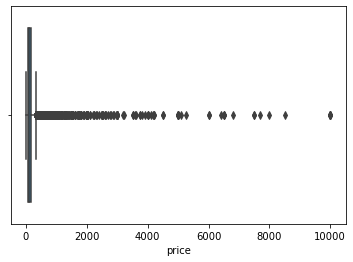

In [29]:
sns.boxplot(x = Airbnb_df['price'])

plt.show()

# using IQR technique

In [30]:
# writing a outlier function for removing outliers in important columns.
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        # interquantile range

  return lower_range,upper_range

In [31]:
lower_bound,upper_bound = iqr_technique(Airbnb_df['price'])

Airbnb_df = Airbnb_df[(Airbnb_df.price>lower_bound) & (Airbnb_df.price<upper_bound)]

(45918, 15)


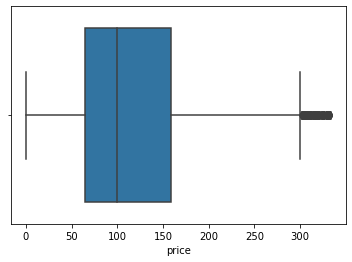

In [32]:
# so the outliers are removed from price column now check with boxplot and also check shape of new Dataframe!

sns.boxplot(x = Airbnb_df['price'])
print(Airbnb_df.shape)

In [34]:
# so here outliers are removed, see the new max price
print(Airbnb_df['price'].max())

333


# Data Visualization
(1) Distribution Of Airbnb Bookings Price Range Using Histogram

Text(0.5, 1.0, 'Distribution of Airbnb Prices')

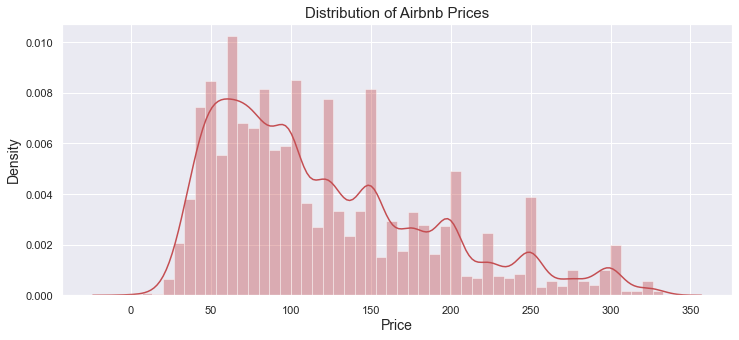

In [35]:
# Create a figure with a custom size
plt.figure(figsize=(12, 5))

# Set the seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

# Create a histogram of the 'price' column of the Airbnb_df dataframe
# using sns distplot function and specifying the color as red
sns.distplot(Airbnb_df['price'],color=('r'))

# Add labels to the x-axis and y-axis
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a title to the plot
plt.title('Distribution of Airbnb Prices',fontsize=15)

* observations -->

1.The range of prices being charged on Airbnb appears to be from 20 to 330 dollars , with the majority of listings falling in the price range of 50 to 150 dollars.

2.The distribution of prices appears to have a peak in the 50 to 150 dollars range, with a relatively lower density of listings in higher and lower price ranges.

3.There may be fewer listings available at prices above 250 dollars, as the density of listings drops significantly in this range.

(2) Total Listing/Property count in Each Neighborhood Group using Count plot

In [36]:
# Count the number of listings in each neighborhood group and store the result in a Pandas series
counts = Airbnb_df['neighbourhood_group'].value_counts()

# Reset the index of the series so that the neighborhood groups become columns in the resulting dataframe
Top_Neighborhood_group = counts.reset_index()

# Rename the columns of the dataframe to be more descriptive
Top_Neighborhood_group.columns = ['Neighborhood_Groups', 'Listing_Counts']

# display the resulting DataFrame
Top_Neighborhood_group

,Neighborhood_Groups,Listing_Counts
0,Manhattan,19501
1,Brooklyn,19415
2,Queens,5567
3,Bronx,1070
4,Staten Island,365


Observations -->

Manhattan and Brooklyn have the highest number of listings on Airbnb, with over 19,000 listings each.

Queens and the Bronx have significantly fewer listings compared to Manhattan and Brooklyn, with 5,567 and 1,070 listings, respectively

Staten Island has the fewest number of listings, with only 365.

The distribution of listings across the different neighborhood groups is skewed, with a concentration of listings in Manhattan and Brooklyn.

Despite being larger in size, the neighborhoods in Queens, the Bronx, and Staten Island have fewer listings on Airbnb compared to Manhattan, which has a smaller geographical area.

This could suggest that the demand for Airbnb rentals is higher in Manhattan compared to the other neighborhoods, leading to a higher concentration of listings in this area.

Alternatively, it could be that the supply of listings is higher in Manhattan due to a higher number of homeowners or property owners in this neighborhood who are willing to list their properties on Airbnb.

(3) Average Price Of Each Neighborhood Group using Point Plot

In [37]:
# Group the Airbnb dataset by neighborhood group and calculate the mean of each group
grouped = Airbnb_df.groupby("neighbourhood_group").mean()

# Reset the index of the grouped dataframe so that the neighborhood group becomes a column
neighbourhood_group_avg_price = grouped.reset_index()

# Rename the "price" column to "avg_price"
neighbourhood_group_avg_price = round(neighbourhood_group_avg_price.rename(columns={"price": "avg_price"}),2)

# Select only the "neighbourhood_group" and "avg_price" columns
neighbourhood_group_avg_price[['neighbourhood_group', 'avg_price']].head()

,neighbourhood_group,avg_price
0,Bronx,77.37
1,Brooklyn,105.70
2,Manhattan,145.90
3,Queens,88.90
4,Staten Island,89.24


Text(0.5, 1.0, 'Average Price by Neighbourhood Group')

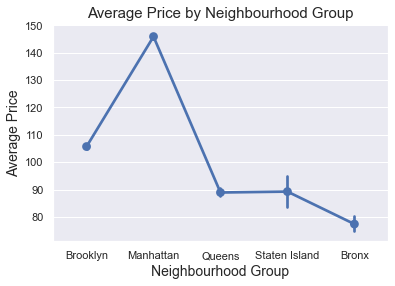

In [38]:
#import mean function from the statistics module 
from statistics import mean

# Create the point plot
sns.pointplot(x = 'neighbourhood_group', y='price', data=Airbnb_df, estimator = np.mean)

# Add axis labels and a title
plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by Neighbourhood Group',fontsize=15)

Observations -->

The average price of a listing in New York City varies significantly across different neighborhoods, with Manhattan having the highest 146 dollars/day average price and the Bronx having the lowest near 77 dollars/day.

In second graph price distribution is very high in Manhattan and Brooklyn.

but Manhattan have more varity in price range, you can see in second violinplot.

The average price increases as you move from the outer boroughs (Bronx, Brooklyn, Queens, and Staten Island) towards the center of the city (Manhattan).

The average price in queens and Staten Island is relatively similar, despite being in different parts of the city.

The data suggests that the overall cost of living in New York City is higher in the center of the city (Manhattan) compared to the outer boroughs. This is likely due to the fact that Manhattan is the most densely populated and commercially important borough, and therefore has higher demand for housing in the centrally located neighborhoods

(4) Top Neighborhoods by Listing/property using Bar plot

In [39]:
# create a new DataFrame that displays the top 10 neighborhoods in the Airbnb NYC dataset based on the number of listings in each neighborhood
Top_Neighborhoods = Airbnb_df['neighbourhood'].value_counts()[:10].reset_index()

# rename the columns of the resulting DataFrame to 'Top_Neighborhoods' and 'Listing_Counts'
Top_Neighborhoods.columns = ['Top_Neighborhoods', 'Listing_Counts']

# display the resulting DataFrame
Top_Neighborhoods

,Top_Neighborhoods,Listing_Counts
0,Williamsburg,3732
1,Bedford-Stuyvesant,3638
2,Harlem,2585
3,Bushwick,2438
4,Upper West Side,1788
5,Hell's Kitchen,1731
6,East Village,1714
7,Upper East Side,1670
8,Crown Heights,1519
9,Midtown,1143


Text(0.5, 1.0, 'Listings by Top Neighborhoods in NYC')

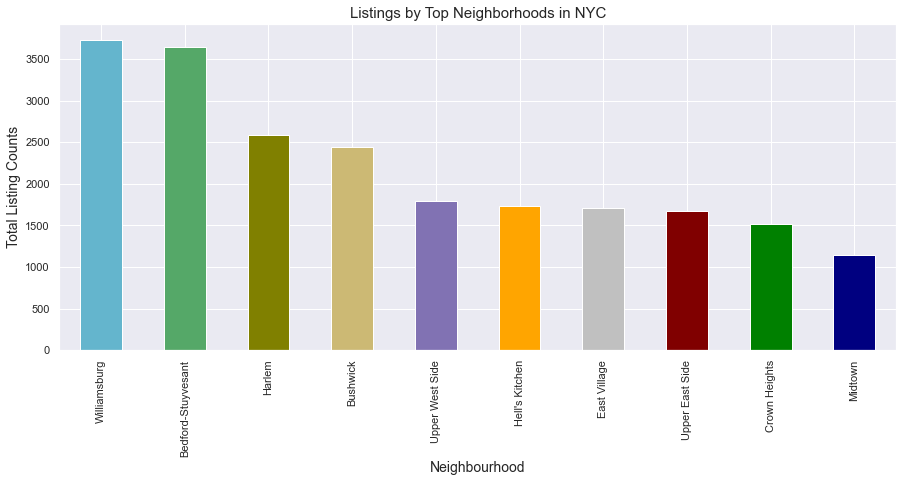

In [40]:
# Get the top 10 neighborhoods by listing count
top_10_neigbourhoods = Airbnb_df['neighbourhood'].value_counts().nlargest(10)

# Create a list of colors to use for the bars
colors = ['c', 'g', 'olive', 'y', 'm', 'orange', '#C0C0C0', '#800000', '#008000', '#000080']

# Create a bar plot of the top 10 neighborhoods using the specified colors
top_10_neigbourhoods.plot(kind='bar', figsize=(15, 6), color = colors)

# Set the x-axis label
plt.xlabel('Neighbourhood', fontsize=14)

# Set the y-axis label
plt.ylabel('Total Listing Counts', fontsize=14)

# Set the title of the plot
plt.title('Listings by Top Neighborhoods in NYC', fontsize=15)

Observations -->

The top neighborhoods in New York City in terms of listing counts are Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick, and the Upper West Side.

The top neighborhoods are primarily located in Brooklyn and Manhattan. This may be due to the fact that these boroughs have a higher overall population and a higher demand for housing.

The number of listings alone may not be indicative of the overall demand for housing in a particular neighborhood, as other factors such as the cost of living and the availability of housing may also play a role.

(5) Top Hosts With More Listing/Property using Bar chart

In [41]:
# create a new DataFrame that displays the top 10 hosts in the Airbnb NYC dataset based on the number of listings each host has
top_10_hosts = Airbnb_df['host_name'].value_counts()[:10].reset_index()

# rename the columns of the resulting DataFrame to 'host_name' and 'Total_listings'
top_10_hosts.columns = ['host_name', 'Total_listings']

# display the resulting DataFrame
top_10_hosts

,host_name,Total_listings
0,Michael,383
1,David,368
2,John,276
3,Sonder (NYC),272
4,Alex,253
5,Sarah,221
6,Daniel,212
7,Maria,197
8,Jessica,185
9,Mike,184


Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

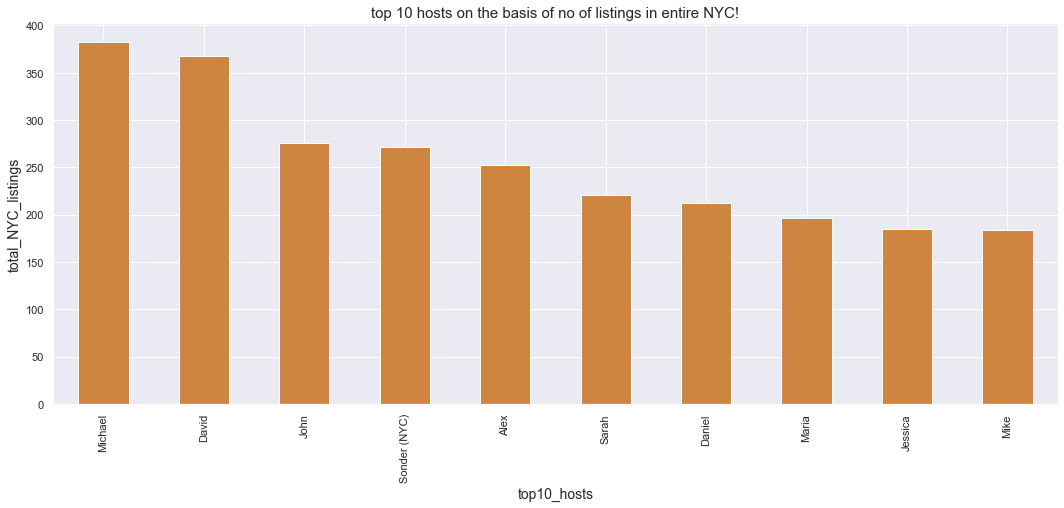

In [42]:
# Get the top 10 hosts by listing count
top_hosts = Airbnb_df['host_name'].value_counts()[:10]

# Create a bar plot of the top 10 hosts
top_hosts.plot(kind='bar', color='peru', figsize=(18, 7))

# Set the x-axis label
plt.xlabel('top10_hosts', fontsize=14)

# Set the y-axis label
plt.ylabel('total_NYC_listings', fontsize=14)

# Set the title of the plot
plt.title('top 10 hosts on the basis of no of listings in entire NYC!', fontsize=15)

Observations -->

The top three hosts in terms of total listings are Michael, David, and John, who have 383, 368, and 276 listings, respectively.

There is a relatively large gap between the top two hosts and the rest of the hosts. For example, john has 276 listings, which is significantly fewer than Michael's 383 listings.

In this top10 list Mike has 184 listings, which is significantly fewer than

Michael's 383 listings. This could indicate that there is a lot of variation in the success of different hosts on Airbnb.

There are relatively few hosts with a large number of listings. This could indicate that the Airbnb market is relatively competitive, with a small number of hosts dominating a large portion of the market.


(6) Stay Requirement counts by Minimum Nights using Bar chart

In [43]:
# Group the DataFrame by the minimum_nights column and count the number of rows in each group
min_nights_count = Airbnb_df.groupby('minimum_nights').size().reset_index(name = 'count')

# Sort the resulting DataFrame in descending order by the count column
min_nights_count = min_nights_count.sort_values('count', ascending=False)

# Select the top 10 rows
min_nights_count = min_nights_count.head(15)

# Reset the index
min_nights_count = min_nights_count.reset_index(drop=True)

# Display the resulting DataFrame
min_nights_count

,minimum_nights,count
0,1,12067
1,2,11080
2,3,7375
3,30,3489
4,4,3066
5,5,2821
6,7,1951
7,6,679
8,14,539
9,10,462


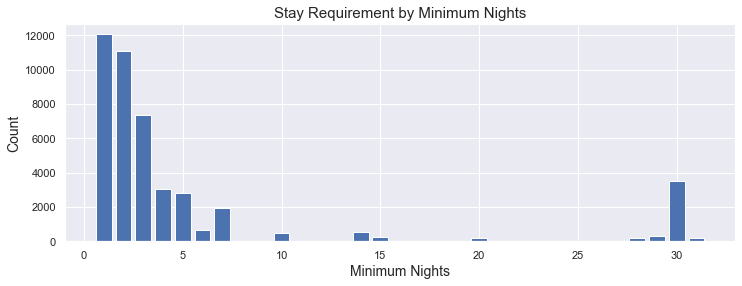

In [44]:
# Extract the minimum_nights and count columns from the DataFrame
minimum_nights = min_nights_count['minimum_nights']
count = min_nights_count['count']

# Set the figure size
plt.figure(figsize=(12, 4))

# Create the bar plot
plt.bar(minimum_nights, count)

# Add axis labels and a title
plt.xlabel('Minimum Nights', fontsize='14')
plt.ylabel('Count', fontsize='14')
plt.title('Stay Requirement by Minimum Nights', fontsize='15')

# Show the plot
plt.show()

Observations -->

The majority of listings on Airbnb have a minimum stay requirement of 1 or 2 nights, with 12067 and 11080 listings, respectively.

The number of listings with a minimum stay requirement decreases as the length of stay increases, with 7375 listings requiring a minimum stay of 3 nights, and so on.

There are relatively few listings with a minimum stay requirement of 30 nights or more, with 3489 and 189 listings, respectively.


(7) Total Reviews by Each Neighborhood Group using Pie Chart

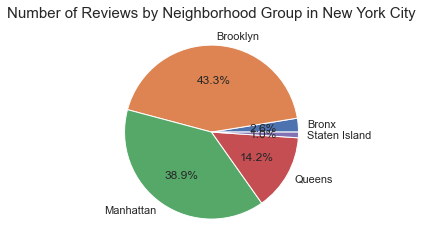

In [45]:
# Group the data by neighborhood group and calculate the total number of reviews
reviews_by_neighbourhood_group = Airbnb_df.groupby("neighbourhood_group")["total_reviews"].sum()

# Create a pie chart
plt.pie(reviews_by_neighbourhood_group, labels=reviews_by_neighbourhood_group.index, autopct='%1.1f%%')
plt.title("Number of Reviews by Neighborhood Group in New York City", fontsize='15')

# Display the chart
plt.show()

Observations -->

Brooklyn has the largest share of total reviews on Airbnb, with 43.3%, followed by Manhattan with 38.9%.

Queens has the third largest share of total reviews, with 14.2%, followed by the Bronx with 2.6% and Staten Island with 1.0%.

The data suggests that Airbnb is more popular in Brooklyn and Manhattan compared to the other neighborhood groups.

Despite having fewer listings, Brooklyn has more reviews on Airbnb compared to Manhattan. This could indicate that Airbnb users in Brooklyn are more likely to leave reviews, or that the listings in Brooklyn are more popular or successful in generating positive reviews. It is worth noting that there could be a number of other factors that could contribute to this difference in reviews, such as the quality of the listings or the characteristics of the travelers who use Airbnb in these areas.


(8) Number of Max. Reviews by Each Neighborhood Group using Pie Chart

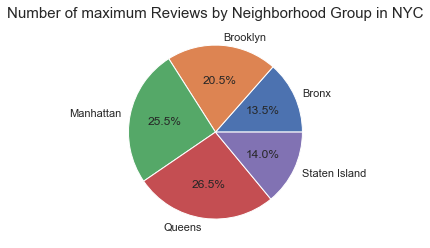

In [46]:
# Group the Airbnb data by neighbourhood group
reviews_by_neighbourhood_group = Airbnb_df.groupby("neighbourhood_group")["total_reviews"].max()

# Create a pie chart to visualize the distribution of maximum number of reviews among different neighbourhood groups
plt.pie(reviews_by_neighbourhood_group, labels=reviews_by_neighbourhood_group.index, autopct='%1.1f%%')

# Add a title to the chart
plt.title("Number of maximum Reviews by Neighborhood Group in NYC", fontsize='15')

# Display the chart
plt.show()

Observations -->

Queens and Manhattan seem to be the most popular neighborhoods for reviewing, as they have both high number of maximum reviews.

Queens has the highest percentage of reviews at 26.5%, but it has the third highest number of listings, behind Manhattan and Brooklyn. This suggests that Queens may be a particularly popular destination for tourists or visitors, even though it has fewer listings compared to Manhattan and Brooklyn.

Manhattan and Brooklyn also have a high percentage of reviews, at 25.5% & 20.5%. This indicates that it is a popular destination for tourists or visitors as well. (number of listings higher than queens)

Overall, this data suggests that Queens, Manhattan, and Brooklyn are the most popular neighborhoods for tourists or visitors, based on the high number of reviews they receive.


(9) Pair Plot Visualization

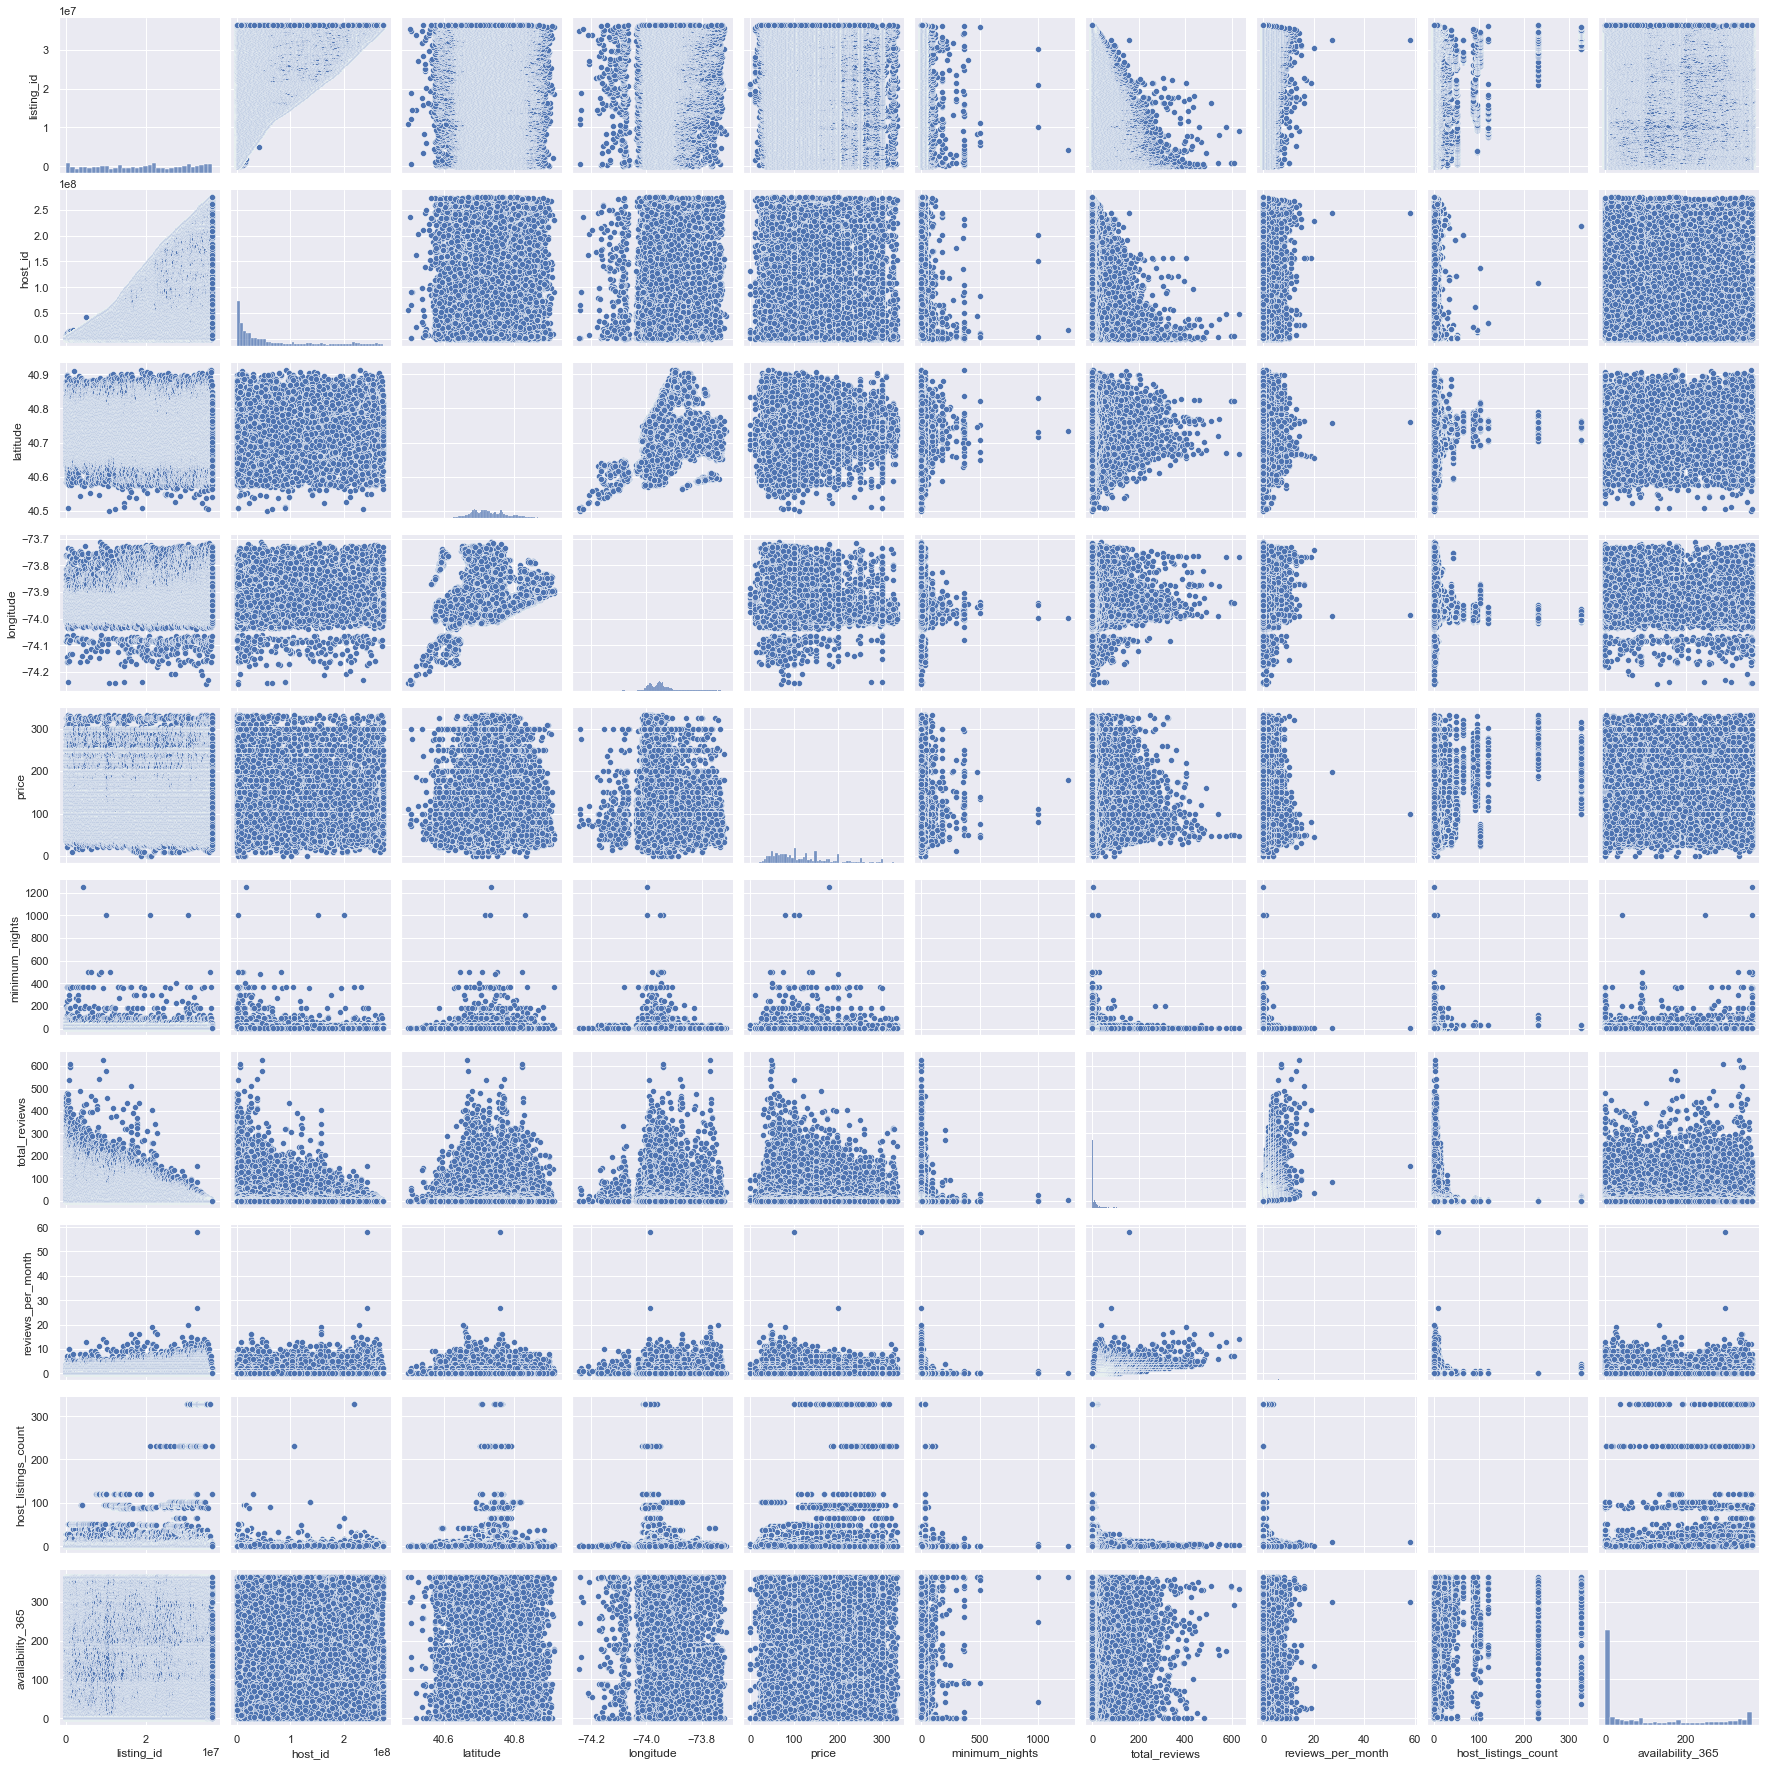

In [47]:
# create a pairplot using the seaborn library to visualize the relationships between different variables in the Airbnb NYC dataset
sns.pairplot(Airbnb_df)

# show the plot
plt.show()

* A pair plot consists of multiple scatterplots arranged in a grid, with each
scatterplot showing the relationship between two variables

* It can be used to visualize relationships between multiple variables and to identify patterns in the data.

# BUSINESS CONCLUSION :-

* Manhattan and Brooklyn have the highest demand for Airbnb rentals, as evidenced by the large number of listings in these neighborhoods. This could make them attractive areas for hosts to invest in property.

* Manhattan is world-famous for its parks, museums, buildings, town, liberty, gardens, markets, island and also its substantial number of tourists throughout the year ,it makes sense that demand and price both high.

* Brooklyn comes in second with significant number of listings and cheaper prices as compared to the Manhattan: With most listings located in Williamsburg and Bedford Stuyvesant two neighborhoods strategically close to Manhattan tourists get the chance to enjoy both boroughs equally while spending less.

* Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick, and the Upper West Side are the top neighborhoods in terms of listing counts, indicating strong demand for Airbnb rentals in these areas.

* The average price of a listing in New York City is higher in the center of the city (Manhattan) compared to the outer boroughs. This could indicate that investing in property in Manhattan may be more lucrative for Airbnb rentals.

* But Manhattan and Brooklyn have the largest number of hosts, indicating a high level of competition in these boroughs.

* The data suggests that Airbnb rentals are primarily used for short-term stays, with relatively few listings requiring a minimum stay of 30 nights or more. Hosts may want to consider investing in property that can accommodate shorter stays in order to maximize their occupancy rate.

* The majority of listings on Airbnb are for entire homes or apartments and also Private Rooms with relatively fewer listings for shared rooms. This suggests that travelers using Airbnb have a wide range of accommodation options to choose from, and hosts may want to consider investing in property that can accommodate multiple guests.

* The data indicates that the availability of Airbnb rentals varies significantly across neighborhoods, with some neighborhoods having a high concentration of listings and others having relatively few.

* The data indicates that there is a high level of competition among Airbnb hosts, with a small number of hosts dominating a large portion of the market. Hosts may want to consider investing in property in areas with relatively fewer listings in order to differentiate themselves from the competition.

* The neighborhoods near the airport in Queens would have a higher average number of reviews, as they are likely to attract a lot of tourists or visitors who are passing through the area. The proximity to the airport could make these neighborhoods a convenient and appealing place to stay for travelers for short-term stay with spending less money because The price distribution is high in Manhattan and Brooklyn.

# THANK YOU